In [29]:
# Importing libraries and setting up the environment
import warnings

warnings.filterwarnings("ignore")  # setting ignore as a parameter
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from statsmodels.genmod.families import Binomial
from matplotlib.colors import ListedColormap
from scipy.stats import f_oneway
from statsmodels.genmod.families import Binomial
from matplotlib.colors import ListedColormap
from scipy.stats import linregress
from scipy.stats import mannwhitneyu
from scipy.stats import kendalltau

image_format = "svg"



In [30]:
# Function to read climate data from
def process_data(filepath):
    variable_data = pd.read_csv(
        filepath,
        names=[
            "LON",
            "LAT",
            "VARNAME",
            "AREA",
            "YEAR",
            "TOTAL",
            "MAX",
            "AVE",
            "MIN",
            "JAN",
            "FEB",
            "MAR",
            "APR",
            "MAY",
            "JUN",
            "JUL",
            "AUG",
            "SEP",
            "OCT",
            "NOV",
            "DEC",
            "REGION",
        ],
    )
    variable_data = variable_data[["LON", "LAT", "YEAR", "TOTAL", "AVE"]]
    variable_data = (
        variable_data.groupby(["YEAR"], as_index=False)
        .agg({"TOTAL": "mean", "AVE": "mean"})
        .round(2)
    )
    return variable_data


# Define shared paths
shared_root_path = (
    "/processing/"
)

# .csv files for all models share the same path except for the model name
prec_data_shared_path = "/data/prec_west.csv"
tair_data_shared_path = "/data/tair_west.csv"
hist_prec_data_shared_path = "/data/historical/prec_west.csv"
hist_tair_data_shared_path = "/data/historical/tair_west.csv"
# hist_tair_data_shared_path ="/fix/west_tas_millennial_1750_2014.csv"

Precipitation

In [31]:
# Import Precipitation Data

# Australia
precipitation_model_1 = process_data(
    shared_root_path + "australia" + prec_data_shared_path
)

# Canada
precipitation_model_2 = process_data(
    shared_root_path + "canada" + prec_data_shared_path
)

# China
precipitation_model_3 = process_data(shared_root_path + "china" + prec_data_shared_path)

# France
precipitation_model_4 = process_data(
    shared_root_path + "france" + prec_data_shared_path
)

# Japan
precipitation_model_5 = process_data(shared_root_path + "japan" + prec_data_shared_path)

# Norway
precipitation_model_6 = process_data(
    shared_root_path + "norway" + prec_data_shared_path
)

# United Kingdom
precipitation_model_7 = process_data(
    shared_root_path + "united_kingdom" + prec_data_shared_path
)

# United States CCSM4
precipitation_model_8 = process_data(
    shared_root_path + "united_states_1" + prec_data_shared_path
)

# United States GFDL
precipitation_model_9 = process_data(
    shared_root_path + "united_states_2" + prec_data_shared_path
)

# Historical Precipitation Data

historical_precipitation = process_data(
    shared_root_path + "aggregate" + hist_prec_data_shared_path
)

In [32]:
# Aggregate data into one dataframe
models_precipitation = [
    precipitation_model_1,
    precipitation_model_2,
    precipitation_model_3,
    precipitation_model_4,
    precipitation_model_5,
    precipitation_model_6,
    precipitation_model_7,
    precipitation_model_8,
    precipitation_model_9,
]
# Aggregate data into one dataframe selecting only the columns of interest
precipitation_agg_models = pd.concat(models_precipitation)
precipitation = (
    precipitation_agg_models.groupby("YEAR")
    .agg({"TOTAL": ["mean", "std"]})
    .reset_index()
)
precipitation.columns = ["YEAR", "TOTAL", "std"]

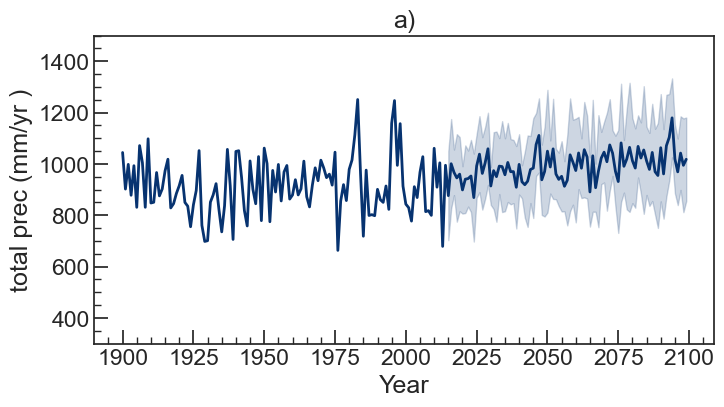

In [33]:
# Plot historical and Future  Precipitation
precipitation_historical_and_future = pd.concat(
    [historical_precipitation, precipitation]
)

precipitation_historical_and_future = precipitation_historical_and_future.query(
    "YEAR >= 1900"
)

# Plot aggregated Precipitation
# set font to 16 for all plots

sns.set(rc={"figure.figsize": (8, 4)})
sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2}, font_scale=1.5)
b2 = sns.lineplot(
    x="YEAR", y="TOTAL", color="#073370", data=precipitation_historical_and_future
)

b2.fill_between(
    precipitation["YEAR"],
    y1=precipitation["TOTAL"] - precipitation["std"],
    y2=precipitation["TOTAL"] + precipitation["std"],
    color="#073370",
    alpha=0.2,
)

plt.ylim(300, 1500)

# plot params
plt.minorticks_on()
plt.tick_params(
    direction="in",
    which="minor",
    length=5,
    bottom=True,
    top=False,
    left=True,
    right=False,
)
plt.tick_params(
    direction="in",
    which="major",
    length=10,
    bottom=True,
    top=False,
    left=True,
    right=False,
)

plt.xlabel("Year")
plt.ylabel("total prec (mm/yr )")
plt.title("a)")
plt.savefig(
    "../figures/precipitation_trend." + image_format,
    format=image_format,
    dpi=1200,
    bbox_inches="tight",
)

Temperature

In [34]:
# Import Temperature Data

# Australia
temperature_model_1 = process_data(
    shared_root_path + "australia" + tair_data_shared_path
)
# Canada
temperature_model_2 = process_data(shared_root_path + "canada" + tair_data_shared_path)

# China
temperature_model_3 = process_data(shared_root_path + "china" + tair_data_shared_path)

# France
temperature_model_4 = process_data(shared_root_path + "france" + tair_data_shared_path)

# Japan
temperature_model_5 = process_data(shared_root_path + "japan" + tair_data_shared_path)

# Norway
temperature_model_6 = process_data(shared_root_path + "norway" + tair_data_shared_path)

# United Kingdom
temperature_model_7 = process_data(
    shared_root_path + "united_kingdom" + tair_data_shared_path
)

# United States CCSM4
temperature_model_8 = process_data(
    shared_root_path + "united_states_1" + tair_data_shared_path
)

# United States GFDL
temperature_model_9 = process_data(
    shared_root_path + "united_states_2" + tair_data_shared_path
)

# Historical Precipitation Data

historical_temperature = process_data(
    shared_root_path + "aggregate" + hist_tair_data_shared_path
)
# historical_temperature = process_data(hist_tair_data_shared_path)

In [35]:
# Aggregate data into one dataframe
models_temperature = [
    temperature_model_1,
    temperature_model_2,
    temperature_model_3,
    temperature_model_4,
    temperature_model_5,
    temperature_model_6,
    temperature_model_7,
    temperature_model_8,
    temperature_model_9,
]
# Aggregate data into one dataframe selecting only the columns of interest
temperature_agg_models = pd.concat(models_temperature)

temperature = (
    temperature_agg_models.groupby("YEAR").agg({"AVE": ["mean", "std"]}).reset_index()
)
temperature.columns = ["YEAR", "AVE", "std"]
temperature ["AVE"] = temperature ["AVE"] - 1

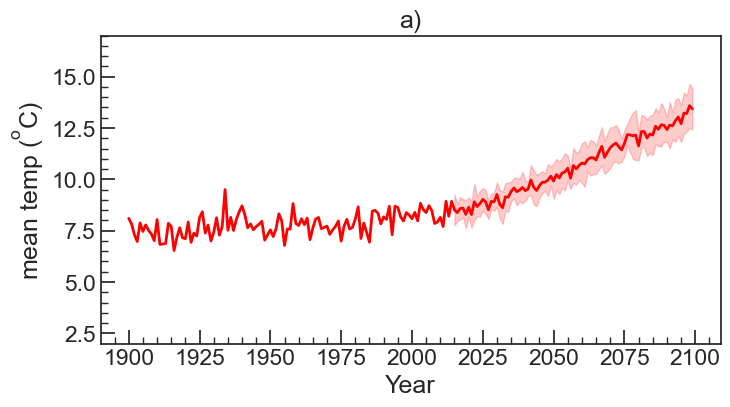

In [36]:
# Plot Historical and Future Temperature
# Subtract 1 from temperature ["AVE"] to bias correct

temperature_historical_and_future = pd.concat([historical_temperature, temperature])
temperature_historical_and_future = temperature_historical_and_future.query(
    "YEAR >= 1900"
)
sns.set(rc={"figure.figsize": (8, 4)})
sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2}, font_scale=1.5)


b2 = sns.lineplot(
    x="YEAR",
    y="AVE",
    color="red",
    data=temperature_historical_and_future,
    errorbar=("ci", True),
)
b2.fill_between(
    temperature["YEAR"],
    y1=temperature["AVE"] - temperature["std"],
    y2=temperature["AVE"] + temperature["std"],
    alpha=0.2,
    color="red",
)


plt.ylim(2, 17)
# plot params
plt.minorticks_on()
plt.tick_params(
    direction="in",
    which="minor",
    length=5,
    bottom=True,
    top=False,
    left=True,
    right=False,
)
plt.tick_params(
    direction="in",
    which="major",
    length=10,
    bottom=True,
    top=False,
    left=True,
    right=False,
)

plt.xlabel("Year")
plt.ylabel("mean temp ($\mathregular{^{o}}$C)")
plt.title("a)" )
plt.savefig(
    "../figures/temperature_trend." + image_format,
    format=image_format,
    dpi=1200,
    bbox_inches="tight",
)

Soil Moisture

In [37]:
# Define functions


# Function to read in data
def process_data(filepath, year):
    variable_data = pd.read_csv(
        filepath,
        names=[
            "LON",
            "LAT",
            "TMPVARNAME",
            "ICOHORT",
            "STANDAGE",
            "POTVEG",
            "CURRENTVEG",
            "SUBTYPE",
            "CMNT",
            "PSIPLUSC",
            "QLCON",
            "CAREA",
            "SUBAREA",
            "YEAR",
            "TOTAL",
            "MAX",
            "AVE",
            "MIN",
            "JAN",
            "FEB",
            "MAR",
            "APR",
            "MAY",
            "JUN",
            "JUL",
            "AUG",
            "SEP",
            "OCT",
            "NOV",
            "DEC",
            "REGION",
        ],
    )

    variable_data = variable_data.query(f"YEAR >= {year}")
    # variable_data["AVE"] = variable_data["AVE"] / variable_data["CAREA"]
    variable_data = variable_data.drop(
        columns=[
            "TMPVARNAME",
            "ICOHORT",
            "POTVEG",
            "STANDAGE",
            "CURRENTVEG",
            "SUBTYPE",
            "CMNT",
            "PSIPLUSC",
            "QLCON",
            "CAREA",
            "SUBAREA",
            "TOTAL",
            "MAX",
            # "AVE",
            "MIN",
            "JAN",
            "FEB",
            "MAR",
            "APR",
            "MAY",
            "JUN",
            "JUL",
            "AUG",
            "SEP",
            "OCT",
            "NOV",
            "DEC",
            "REGION",
        ]
    )
    variable_data = (
        variable_data.groupby(["LON", "LAT", "YEAR"], as_index=False)
        .agg({"AVE": "mean"})
        .round(2)
    )

    variable_data = variable_data.groupby(["YEAR"]).agg({"AVE": "mean"}).reset_index()

    return variable_data


# Define shared paths
shared_root_path = (
    "/processing/"
)


# smois_data_shared_path = "/data/output_bakeoff/smois_bakeoff_result.csv"
smois_data_shared_path = "/data/VSM.csv"


# Aggregate Future Models Return 1 Datafram
def aggregate_data(variable_models):
    future_variable = pd.concat(variable_models)
    future_variable = (
        future_variable.groupby(["YEAR"]).agg({"AVE": ["mean", "std"]}).reset_index()
    )

    future_variable.columns = ["YEAR", "AVE", "std"]
    return future_variable


# Import Data


# Australia

smois_model_1 = process_data(
    shared_root_path + "australia" + smois_data_shared_path, 2014
)  # SMOIS

# Canada

smois_model_2 = process_data(shared_root_path + "canada" + smois_data_shared_path, 2014)


# China

smois_model_3 = process_data(
    shared_root_path + "china" + smois_data_shared_path, 2014
)  # SMOIS

# France

smois_model_4 = process_data(
    shared_root_path + "france" + smois_data_shared_path, 2014
)  # SMOIS


# Japan

smois_model_5 = process_data(
    shared_root_path + "japan" + smois_data_shared_path, 2014
)  # SMOIS


# Norway

smois_model_6 = process_data(
    shared_root_path + "norway" + smois_data_shared_path, 2014
)  # SMOIS


# United Kingdom

smois_model_7 = process_data(
    shared_root_path + "united_kingdom" + smois_data_shared_path, 2014
)  # SMOIS


# United States CCSM4

smois_model_8 = process_data(
    shared_root_path + "united_states_1" + smois_data_shared_path, 2014
)  # SMOIS


# United States GFDL

smois_model_9 = process_data(
    shared_root_path + "united_states_2" + smois_data_shared_path, 2014
)  # SMOIS

# Variables to list of future models dataframes
smois_models = [
    smois_model_1,
    smois_model_2,
    smois_model_3,
    smois_model_4,
    smois_model_5,
    smois_model_6,
    smois_model_7,
    smois_model_8,
    smois_model_9,
]
agg_future_model_smois = aggregate_data(smois_models)


# Historical data

historical_model_smois = process_data(
    shared_root_path + "historical/data/VSM_1.csv", 1900
)  # SMOIS

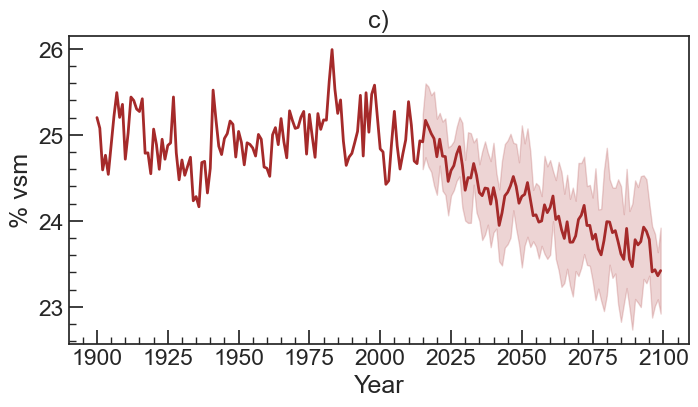

In [38]:
# Plot historical and Future  SMOIS
smois_historical_and_future = pd.concat(
    [historical_model_smois, agg_future_model_smois]
)

smois_historical_and_future = smois_historical_and_future.query("YEAR >= 1900")
sns.set(rc={"figure.figsize": (8, 4)})
sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2}, font_scale=1.5)
b2 = sns.lineplot(
    x="YEAR", y="AVE", color="brown", data=smois_historical_and_future, ci=None
)


b2.fill_between(
    agg_future_model_smois["YEAR"],
    y1=agg_future_model_smois["AVE"] - agg_future_model_smois["std"],
    y2=agg_future_model_smois["AVE"] + agg_future_model_smois["std"],
    color="brown",
    alpha=0.2,
)

# plot params
plt.minorticks_on()
plt.tick_params(
    direction="in",
    which="minor",
    length=5,
    bottom=True,
    top=False,
    left=True,
    right=False,
)
plt.tick_params(
    direction="in",
    which="major",
    length=10,
    bottom=True,
    top=False,
    left=True,
    right=False,
)

# set y axis limits
# plt.ylim(3.5, 5)

plt.xlabel("Year")
plt.ylabel(r"% vsm")
plt.title("c)", )

plt.savefig(
    "../figures/smois_trend." + image_format,
    format=image_format,
    dpi=1200,
    bbox_inches="tight",
)

plt.show()

In [39]:
data_list=[historical_precipitation, precipitation, historical_temperature, temperature, historical_model_smois, agg_future_model_smois]
var_column_list=["TOTAL","TOTAL","AVE","AVE","AVE","AVE"]
time_column_list=["YEAR", "YEAR", "YEAR", "YEAR", "YEAR", "YEAR"]
label_list=["PREC_HIST", "PREC_FUT", "TAIR_HIST", "TAIR_FUT", "VSM_HIST", "VSM_FUT"]
period_list=["1900-2014", "2014-2100", "1900-2014", "2014-2100", "1900-2014", "2014-2100"]
source_list=["HISTORICAL_OBSERVATION", "FUTURE_MODEL", "HISTORICAL_OBSERVATION", "FUTURE_MODEL", "HISTORICAL_OBSERVATION", "FUTURE_MODEL"]

result_df = pd.DataFrame()

for i, df in enumerate(data_list):
    y = df[var_column_list[i]]
    x = df[time_column_list[i]]

    trend_stat, p_value = kendalltau(y, x)

    stats_dict = {
        "trend_stat": trend_stat,
        "p_value": p_value,
        "trend_direction": "no trend "
        if abs(trend_stat) < 0.1
        else ("+" if trend_stat > 0 else "-"),
        "label": label_list[i],
        "period": period_list[i],
        "source": source_list[i]
    }

    result_df = result_df.append(stats_dict, ignore_index=True)
    
# , add a column on result_df called signicant if p_value < 0.05 set value to 1 pvalue > 0.05 set value to 0

if p_value < 0.05:
    result_df["significant"] = 1
else:
    result_df["significant"] = 0


result_df.to_csv("../data/climate_trend_stats_results.csv", header=True, index=False)